In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import signal

plt.style.use('seaborn')

In [13]:
def load_data(filename, name):
    try:
        data = pd.read_csv(filename, header=None, sep='\s+')
    except FileNotFoundError:
        print('No file found with that name')

    data.columns = ['Index', 'ASIC Index', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
                   'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22',
                   'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'Meta']
    data.name = name
    # The first 256 rows are the pedestal data
    ped = data[:256]
    return (data, ped)

In [33]:
def discriminate_events(data, channel, num_events, start=256, width=256, save=False):
    chan = pd.DataFrame(index=range(256))
    for i in range(num_events):
        chan.append(data['C{}'.format(channel)].loc[
            i * width + start:(i + 1) * width - 1 + start
        ], ignore_index=True)

    if save:
        directory = 'event_data'
        if not os.path.exists(directory):
            os.makedirs(directory)
        chan.to_csv('{}/{}.csv'.format(directory,channel.name))
    
    chan.name = data.name
    return chan

In [23]:
def plot_event(channel, ped, event=0):
    fig = plt.figure()
    plt.plot(channel[event]-ped['C2'])
    plt.xlabel('Time (100 ps)')
    plt.ylabel('ADC Counts')
    plt.title('Event: '+ str(event))

In [16]:
def plot_all_events(channel, ped):
    directory = 'figs/'+channel.name
    if not os.path.exists(directory):
        os.makedirs(directory)
    for event in channel:
        fig = plt.figure()
        plt.plot(channel[event]-ped['C2'])
        plt.xlabel('Time Axis')
        plt.ylabel('ADC Counts')
        plt.title('Event: '+ str(event))
        plt.savefig('{}/event_{}'.format(directory, str(event)))
        plt.close()

In [17]:
def shift_plot(channel, idx, shift=0, event=0):
    y = channel[event]
    t = (idx - shift) % 256
    sped = ped['C2'].copy()
    sped.index = (ped['Index'].copy() - shift) % 256
    plt.plot(t, (y-sped))

In [27]:
data, ped = load_data('data/test2.acdc.dat', 'test2')

In [34]:
# idx = discriminate_events(data, 'Index', 50)
ch2 = discriminate_events(data, 2, 50)
print(ch2)
# ch2.name='test2'
# plot_event(ch2, ped, 3)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[256 rows x 0 columns]


In [35]:
cols = ['Index', 'ASIC Index', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
               'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22',
               'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'Meta']

data = pd.read_csv(filename, header=None, sep='\s+', names=cols)


data.name = name
# The first 256 rows are the pedestal data
ped = data[:256]
return (data, ped)

NameError: name 'filename' is not defined

In [167]:
def load_data(filename, num_events):
    data = np.genfromtxt(filename)
    ped = data[:256].T
    width = 256
    
    channel_data = [[
            data[width * (i + 1):(i + 2) * width, ch]
         for i in range(num_events) 
        ]for ch in range(33)]
        
    return (np.asarray(channel_data), ped)

def plot_event(data,ch, ped, events=[0], path=None):
    [plt.plot(data[ch+1, event] - ped[ch+1], label='Evt:{}'.format(event))
     for event in events]
    plt.legend()
    plt.title('Channel:Event | {}:{}'.format(ch, events))
    plt.xlabel('Time (100 ps)')
    plt.ylabel('ADC Counts')

    if path:
        directory = 'figs/{}'.format(path)
        if not os.path.exists(directory):
            os.makedirs(directory)
        plt.savefig('{}/ch{}-{}'.format(directory, ch, events))

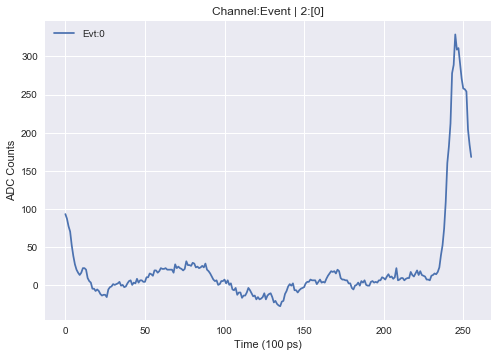

In [168]:
data, ped = load_data('data/test2.acdc.dat', 50)
plot_event(data, 2, ped, path='test')

In [62]:
data[0]

array([    0.,     0.,  2805.,  2805.,  2752.,  2693.,  2762.,  2707.,
        2688.,  2614.,  2717.,  2682.,  2721.,  2636.,  2881.,  2802.,
        2863.,  2824.,  2866.,  2761.,  2749.,  2748.,  2618.,  2722.,
        2843.,  2716.,  2755.,  2756.,  2678.,  2551.,  2732.,  2647.,
           0.])